<a href="https://colab.research.google.com/github/cortes28/image_cnnpyTorch_clothes_model/blob/main/compu_vision_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libraries in PyTorch
* `torchvision` - base domain lobrary for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision here
* `torchvision.models` - get a pretrained model of computer vision that we can use for our own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.Dataloader` - Creates a Python iterable over a dataset

Following https://www.youtube.com/watch?v=V_xro1bcAuA&t=68152s on how to develop a CNN Model on exploring and predicting images based on multiple categories of clothing objects.

In [ ]:
import torch
from torch                  import nn
import torchvision
from torchvision            import datasets
from torchvision            import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot    as plt

# versions
print(torch.__version__)
print(torchvision.__version__)



2.0.1+cu118
0.15.2+cu118


## 1. Getting a dataset

The dataset will be from FashionMNIST from torchvision.datasets-

In [ ]:
#
train_data = datasets.FashionMNIST( root ="data",    # where to download data too
                                   train = True,     # is it a training dataset that we want
                                    download = True, # We want to download it
                                    transform = torchvision.transforms.ToTensor(), # how to transform the data in our case to tensors
                                    target_transform = None # How to transform the labels/targets
                                    )

test_data = datasets.FashionMNIST( root ="data",    # where to download data too
                                   train = False,     # not the training dataset
                                    download = True, # We want to download it
                                    transform = ToTensor(), # how to transform the data in our case to tensors
                                    target_transform = None # How to transform the labels/targets
                                    )

100%|██████████| 26421880/26421880 [00:00<00:00, 112759277.92it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 9059929.93it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 64243595.98it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23964791.33it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# see first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#shape of image
print(f"Image shape: {image.shape} -> [color channels, height, width]")
# first label of the first value of the training dataset
print(f"Image label: {class_names[label]}")
# for the color channel, it is only 1 value as its black/white grayscale...so black is 0 and white is 1.

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label: Ankle boot


## 1.2 Visualize the data


image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

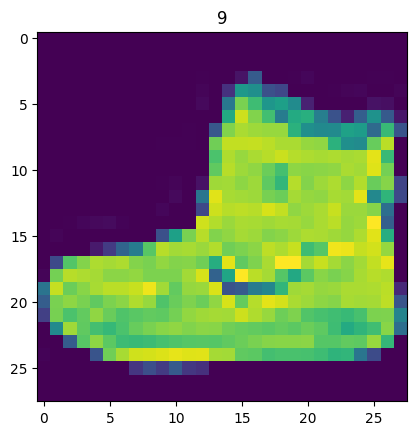

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

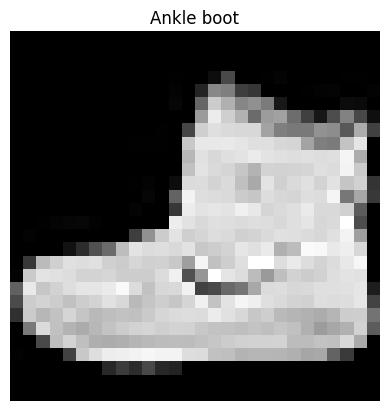

In [ ]:
plt.imshow(image.squeeze(), cmap ="gray")
plt.title(class_names[label])
plt.axis(False)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


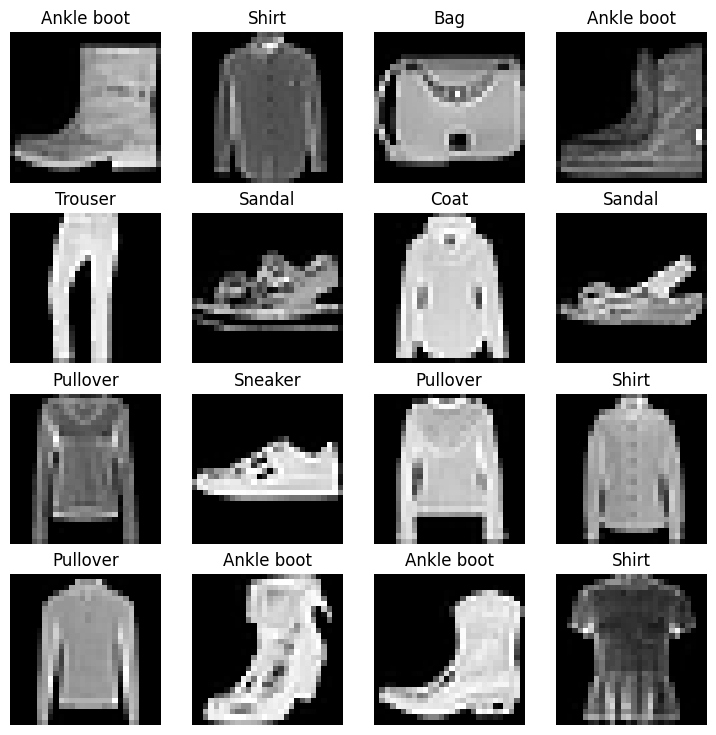

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (9, 9))

rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  print(random_idx)
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns out data into a Python iterable

we want to turn our data into batches (mini-batches). -> it is more computationally efficient, as in, computing hardware may not be able to look (store in memory) at 60,000 images in one hit. We can break it down to 32 images at a time (batch size of 32). It gives the neural network more chances to update its gradients per epoch

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# dataset -> iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

# It is ok for our test data to be not shuffled as gradient is turned off so it is not learning based on the 'order' of the values
# we're simply evaluating the test datapoints to test our model
test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c5546ecaaa0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c5546eca8f0>)

In [ ]:
# Look at what was created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c5546ecaaa0>, <torch.utils.data.dataloader.DataLoader object at 0x7c5546eca8f0>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [ ]:
# look what is inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


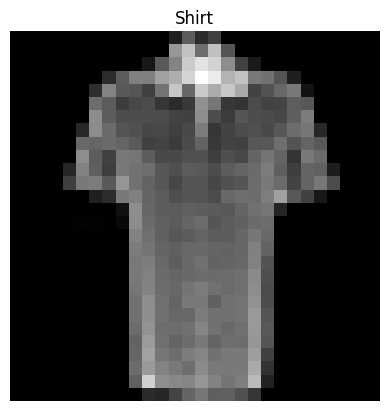

In [ ]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [ ]:
# create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass

# print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channel, height, width]")
print(f"Shape after flattening: {output.shape} -> [color channel, height * width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color channel, height * width]


In [ ]:
output  # values all in one big vector

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [ ]:
from torch import nn

class FashionMNISTModel(nn.Module):
  def __init__(self,
               input_shape:  int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features  = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features  = hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModel(
    input_shape = 784, # width * height this is a result from the Flatten thus we have to change it to 784
    hidden_units = 10, # how many units in the hidden layer
    output_shape = len(class_names) # one for each class
).to("cpu")

model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss functio will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer will be `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric.

In [ ]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values ect)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
#...
end_time = timer()
print_train_time(start = start_time,
                 end = end_time,
                 device = "cpu")

Train time on cpu: 0.000 seconds


0.0004954580000031683

### 3.3 Creating a training loop and trianing a model on batches of data

1. Loop through epochs
2. loop thorugh the training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [ ]:
# Import tqdm for progress bar to better visualize how far we are within data
from tqdm.auto import tqdm

# set the seed and timer
torch.manual_seed(42)
ttso_cpu = timer()

# set number of epochs (we'll keep this small number for a faster training time)
epochs = 3

# create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n----")
  ### Training
  train_loss = 0

  # add a loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # getting the total loss of an epoch and accumulate it (remember we are training batches so we have to have to add the loss of every batch)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer set
    optimizer.step()

    # print out what's happening
    if batch % 400 == 0:
      print(f"Look at {batch * len(X)} / {len(train_dataloader.dataset)} samples. ")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X_test)

      # 2. calculate the loss (accumulated) from our predicted values to the true values of the test dataset
      test_loss += loss_fn(test_pred, y_test)

      # 3. calculate accuracy from the true values to the test values
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out what is happening
  print(f"\nTrain loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, test acc: {test_acc:.4f}")

# calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = ttso_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----
Look at 0 / 60000 samples. 
Look at 12800 / 60000 samples. 
Look at 25600 / 60000 samples. 
Look at 38400 / 60000 samples. 
Look at 51200 / 60000 samples. 

Train loss: 0.5904 | Test Loss: 0.5095, test acc: 82.0387
Epoch: 1 
----
Look at 0 / 60000 samples. 
Look at 12800 / 60000 samples. 
Look at 25600 / 60000 samples. 
Look at 38400 / 60000 samples. 
Look at 51200 / 60000 samples. 

Train loss: 0.4763 | Test Loss: 0.4799, test acc: 83.1969
Epoch: 2 
----
Look at 0 / 60000 samples. 
Look at 12800 / 60000 samples. 
Look at 25600 / 60000 samples. 
Look at 38400 / 60000 samples. 
Look at 51200 / 60000 samples. 

Train loss: 0.4550 | Test Loss: 0.4766, test acc: 83.4265
Train time on cpu: 55.116 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

In [ ]:
## 4. Make predictions and get model 0 results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of  model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1))

    # Scale loss and acc to find the average loss/ acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                              data_loader = test_dataloader,
                              loss_fn = loss_fn,
                              accuracy_fn = accuracy_fn)


model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
## 5. setup device agnostic-code (for using GPU if possible)
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


## 6. Model 1: Building a model now with non-linearity


In [ ]:
from torch import nn

class FashionMNISTModel_v1(nn.Module):
  def __init__(self,
               input_shape:  int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features  = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features  = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# create new object of our new model
torch.manual_seed(42)
model_1 = FashionMNISTModel_v1(input_shape = 784,     # the height * width of our image -> it gets flatten down to a vector for the model
                               hidden_units = 10,
                               output_shape = len(class_names)).to(device)      # sets it to the total number of possible outputs and to device available (to GPU)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# loss and optimizer and evaluation metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # Measures how wrong our model is
optimizer = torch.optim.SGD(params = model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr = 0.1)

### Create the training/evaluation loop as a function for modularity

Function for
* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
   ### Training
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # add a loop through training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put our data into the appropiate device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # getting the total loss of an epoch and accumulate it (remember we are training batches so we have to have to add the loss of every batch)
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim = 1))    # go from logits to prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer set
    optimizer.step()

    # print out what's happening
    if batch % 400 == 0:
      print(f"Look at {batch * len(X)} / {len(train_dataloader.dataset)} samples. ")

  # Divide total train loss  and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on module going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model on eval mode and set it on inference mode
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      # Set data to target device
      X, y = X.to(device), y.to(device)

      # 1. forward pass
      test_pred = model(X)

      # 2. calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y,
                           y_pred = test_pred.argmax(dim = 1)) # logits to prediction labels


    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")



In [ ]:
# Import tqdm for progress bar to better visualize how far we are within data
from tqdm.auto import tqdm
from timeit import default_timer as timer

# set the seed and timer
torch.manual_seed(42)
start_time = timer()

# set number of epochs (we'll keep this small number for a faster training time)
epochs = 3

# create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"~~~~~~~~~~~~~~~~~~~~~~~~Epoch: {epoch}~~~~~~~~~~~~~~~~~~~~~~~~\n")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model=model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time = timer()
total_time = print_train_time(start_time, train_time, device = device)



  0%|          | 0/3 [00:00<?, ?it/s]

~~~~~~~~~~~~~~~~~~~~~~~~Epoch: 0~~~~~~~~~~~~~~~~~~~~~~~~

Look at 0 / 60000 samples. 
Look at 12800 / 60000 samples. 
Look at 25600 / 60000 samples. 
Look at 38400 / 60000 samples. 
Look at 51200 / 60000 samples. 
Train loss: 1.09199 | Train acc: 61.34
Test loss: 0.9564 | Test accuracy: 64.9960
~~~~~~~~~~~~~~~~~~~~~~~~Epoch: 1~~~~~~~~~~~~~~~~~~~~~~~~

Look at 0 / 60000 samples. 
Look at 12800 / 60000 samples. 
Look at 25600 / 60000 samples. 
Look at 38400 / 60000 samples. 
Look at 51200 / 60000 samples. 
Train loss: 0.78101 | Train acc: 71.93
Test loss: 0.7223 | Test accuracy: 73.9117
~~~~~~~~~~~~~~~~~~~~~~~~Epoch: 2~~~~~~~~~~~~~~~~~~~~~~~~

Look at 0 / 60000 samples. 
Look at 12800 / 60000 samples. 
Look at 25600 / 60000 samples. 
Look at 38400 / 60000 samples. 
Look at 51200 / 60000 samples. 
Train loss: 0.67027 | Train acc: 75.94
Test loss: 0.6850 | Test accuracy: 75.0200
Train time on cuda: 51.009 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

55.116058408000015

**Important: ** Depending on the hardware/data that we are dealing with. It may be possible that the model trains faster on the CPU over the GPU

* Could be that the process of copying and moving our model to the GPU may be wasting a lot of time and in the end the compute benefits offered by the GPU do not seem as benefical as to remaining on the CPU.
* hardware could have a better CPU compared to a GPU.

In [ ]:
## 4. Make predictions and get model 0 results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  """Returns a dictionary containing the results of  model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # set it to proper device that the model will use
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1))

    # Scale loss and acc to find the average loss/ acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}



In [ ]:
# model 1 dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_1_results

{'model_name': 'FashionMNISTModel_v1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

In [ ]:
# Create a convolutional neural network
class FashionNMISTmodel_v2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explaier website
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),              # values that we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7, # currently `* 0 ` to later discover what is the appropiate value.
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionNMISTmodel_v2(input_shape = 1,     # only 1 color channel (black/white) if it were a colored picture-> 3
                               hidden_units = 10,
                               output_shape = len(class_names)).to(device)

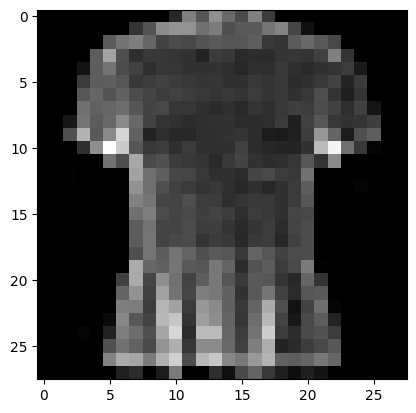

In [ ]:
plt.imshow(image.squeeze(), cmap ="gray")


Output shape of conv_block_2: torch.Size([1, 10, 7, 7]) this tensor gets sent to the classifier and it gets flattened...
meaning

thats where the error `mat1 and mat2 shapes cannot be multiplied (1x490 and 10x10)` the inner values 490 and 10 have to be the same
so that matrix multiplication can occur -> in the class model FashionNMISTmodel_v2 in the self.classifier

`
  self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units ,
                  out_features = output_shape)
    )
`

 hidden units is 10 and that is where the 10 comes from. So we have to multiply it by 7 and 7 again to get 490. With that
 value, we can now perform matrix multiplication.

 490 = 10 * 7 * 7 for hidden units


In [ ]:
rand_image_tensor = torch.rand(size = (1, 28, 28)).to(device)
rand_image_tensor.shape
# put an image through the model
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 looking at the inside of `nn.Conv2d(...)`


In [ ]:
torch.manual_seed(42)

# create a batch of images
images = torch.rand(size = (32, 3, 64, 64))
test_image = images[0]

print(f"Image Batch shape:{images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test image: \n {test_image}")

Image Batch shape:torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test image: 
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0

In [ ]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = (3, 3), # our (3,3)
                       stride = 1,
                       padding = 1)

# pass the data through the convlulation layer
conv_output = conv_layer(test_image)
conv_output.shape, conv_output

(torch.Size([10, 64, 64]),
 tensor([[[-3.3371e-01, -3.3281e-01, -5.0839e-01,  ..., -2.3694e-01,
           -2.8108e-01, -3.1808e-01],
          [-3.3042e-01, -4.4324e-01, -4.2661e-01,  ..., -4.0290e-01,
           -2.5801e-01, -3.9595e-01],
          [-5.5963e-02, -5.1716e-01, -6.2803e-01,  ..., -2.6973e-01,
           -3.3916e-01, -3.8857e-01],
          ...,
          [-2.7309e-02, -3.8492e-01, -4.6536e-01,  ..., -4.6891e-01,
           -4.6570e-01, -2.2956e-01],
          [-1.9740e-01, -5.4037e-01, -1.7201e-01,  ..., -5.2281e-01,
           -5.0674e-01, -2.9564e-01],
          [-2.5090e-01, -5.9542e-01, -6.7210e-01,  ..., -5.3584e-01,
           -3.1367e-01, -2.2348e-01]],
 
         [[ 3.9225e-01,  2.5645e-01, -3.9998e-04,  ...,  3.4384e-02,
            3.2497e-01, -2.5311e-01],
          [ 2.9956e-01, -5.3156e-01, -1.8046e-01,  ...,  1.7471e-01,
           -1.2710e-01, -5.2937e-01],
          [-1.2867e-03, -1.5943e-02, -2.4883e-01,  ..., -2.7878e-01,
           -3.0863e-01, -4.368

### 7.2 Stepping through a `nn.MaxPool2d()`


In [ ]:
test_image

tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# create sample nn.MaxPool2d()
max_pool_layer = nn.MaxPool2d(kernel_size=2)

print(f"the original shape: {test_image.shape}")
print(f"the unsqueezed shape that will go inside the conv_layer(): {test_image.unsqueeze(dim=0).shape}")

# Pass data through just hte conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through the conv_layer(): {test_image_through_conv.shape}")


# pass data through the max pool layer
test_image_through_c_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() then max_pool2d() layer: {test_image_through_c_max_pool.shape}")


the original shape: torch.Size([3, 64, 64])
the unsqueezed shape that will go inside the conv_layer(): torch.Size([1, 3, 64, 64])
Shape after going through the conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() then max_pool2d() layer: torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimensions to our images
rdm_tensor = torch.rand(size= (1, 1, 2, 2))
print(f"tensor: \n{rdm_tensor}")
print(f" rdm tensor shape: {rdm_tensor.shape}")

#max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# pass tensor through that layer
max_pool_tensor = max_pool_layer(rdm_tensor)
print(f"after maxPool2d: \n{max_pool_tensor}")

print(f"after maxPool2d shape: {max_pool_tensor.shape}")

tensor: 
tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
 rdm tensor shape: torch.Size([1, 1, 2, 2])
after maxPool2d: 
tensor([[[[0.9593]]]])
after maxPool2d shape: torch.Size([1, 1, 1, 1])


In [ ]:
### 7.3 Setup loss and optimizer function for model 2
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)


### 7.4 Training and testing `model_2`  using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure the time
from timeit import default_timer as timer
start_time3 = timer()

# Train and test the model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"\n===================Epoch: {epoch}===================\n")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

end_time3 = timer()
total_time2 = print_train_time(start_time3, end_time3, device = device)








  0%|          | 0/3 [00:00<?, ?it/s]


===================Epoch: 0===================

Look at 0 / 60000 samples. 
Look at 12800 / 60000 samples. 
Look at 25600 / 60000 samples. 
Look at 38400 / 60000 samples. 
Look at 51200 / 60000 samples. 
Train loss: 0.59362 | Train acc: 78.47
Test loss: 0.4063 | Test accuracy: 85.4732

===================Epoch: 1===================

Look at 0 / 60000 samples. 
Look at 12800 / 60000 samples. 
Look at 25600 / 60000 samples. 
Look at 38400 / 60000 samples. 
Look at 51200 / 60000 samples. 
Train loss: 0.36339 | Train acc: 86.97
Test loss: 0.3522 | Test accuracy: 86.7911

===================Epoch: 2===================

Look at 0 / 60000 samples. 
Look at 12800 / 60000 samples. 
Look at 25600 / 60000 samples. 
Look at 38400 / 60000 samples. 
Look at 51200 / 60000 samples. 
Train loss: 0.32678 | Train acc: 88.24
Test loss: 0.3321 | Test accuracy: 87.9493
Train time on cuda: 40.273 seconds


In [ ]:
!nvidia-smi

Thu Jul 20 01:46:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    32W /  70W |   1125MiB / 15360MiB |     10%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionNMISTmodel_v2',
 'model_loss': 0.3321397006511688,
 'model_acc': 87.94928115015975}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.476639,83.426518
1,FashionMNISTModel_v1,0.685001,75.019968
2,FashionNMISTmodel_v2,0.332140,87.949281


In [ ]:
# add a column looking at the training time =
compare_results["training_time"] = [total_train_time_model_0,
                                    total_time,
                                    total_time2]

In [ ]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel,0.476639,83.426518,55.116058
1,FashionMNISTModel_v1,0.685001,75.019968,51.009295
2,FashionNMISTmodel_v2,0.332140,87.949281,40.273176


Text(0, 0.5, 'Accuracy (%)')

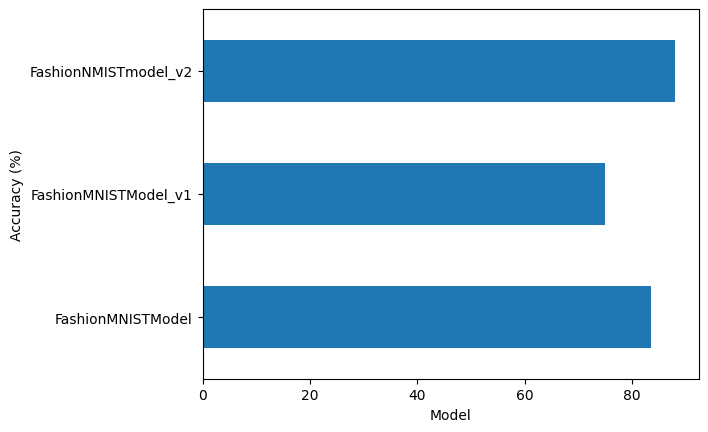

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")

In [ ]:
## 9. Make and Evaluate random predictions with best model
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off GPU for more calculations
      pred_probs.append(pred_prob.cpu())

    # stack pred probs to turn list into a tensor
    return torch.stack(pred_probs)



In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

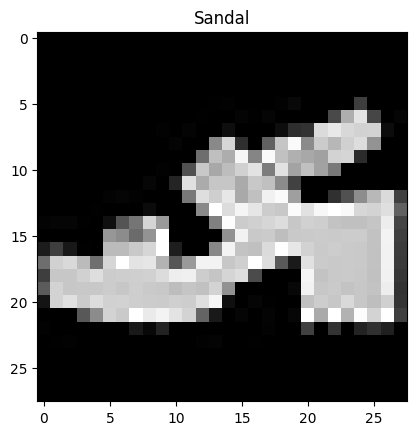

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View the first 2 predictions
pred_probs[:2]

tensor([[5.4335e-07, 2.4888e-08, 1.0544e-07, 3.1903e-06, 3.2166e-08, 9.9978e-01,
         3.5011e-06, 1.8348e-05, 8.1474e-05, 1.0839e-04],
        [5.0448e-02, 5.7514e-01, 2.0624e-03, 1.6378e-01, 5.6033e-02, 4.8245e-04,
         1.4879e-01, 1.3901e-03, 6.1650e-04, 1.2566e-03]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
import random
random.seed(21)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([9, 2, 6, 6, 9, 7, 5, 4, 3])

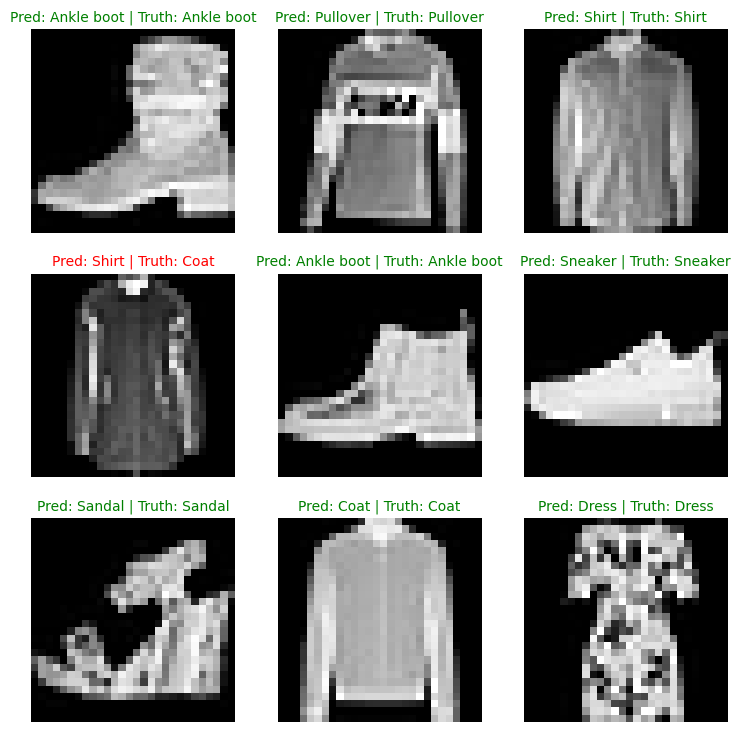

In [ ]:
plt.figure(figsize=(9,9))
rows = 3
cols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(rows, cols, i + 1)

  # plot the image
  plt.imshow(sample.squeeze(), cmap = "gray")

  # find the prediction label (text -> 'shirt')
  pred_label = class_names[pred_classes[i]]

  # truth label (text)
  truth_label = class_names[test_labels[i]]

  # Title of plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check if pred and truth are the same
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # prediction is correct
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)


## 10. Making a confusion matrix to evaluate our model a bit more

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
# import tqdm.auto
from tqdm.auto import tqdm

# make predictions with the model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making our predictions..."):
    # set it to the appropiate device
    X, y = X.to(device), y.to(device)
    # Do the forward pass (get raw logits)
    y_logits = model_2(X)
    # Turn preds (logits) -> prediction labels
    y_pred = torch.softmax(y_logits.squeeze(), dim = 0).argmax(dim = 1)

    # put the predicted values on CPU for evaluation (plotting)
    y_preds.append(y_pred.cpu())

  # combine predictions into a tensor
  #print(y_preds[:10])
  y_pred_tensor = torch.cat(y_preds)
  print(y_pred_tensor[:10])
  print(f"Total predictions: {len(y_pred_tensor)}")


Making our predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
Total predictions: 10000


In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be greater or equal to 0.19.0"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 9.0 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.22.0


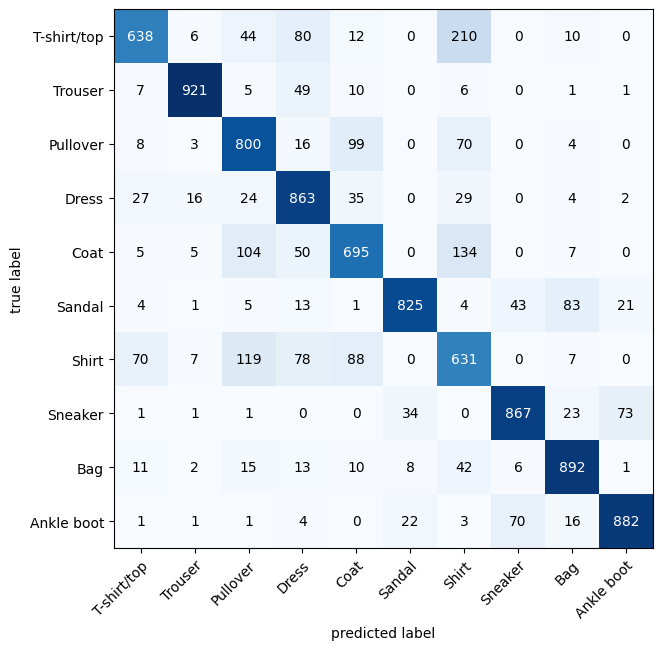

In [ ]:
from torchmetrics     import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup the confusion instance and compare prediction to the target
conf_matrix = ConfusionMatrix(task="multiclass", num_classes = len(class_names))
conf_matrix_tensor = conf_matrix(preds = y_pred_tensor,
                             target=test_data.targets)

# 3. Plot the confusion matrix
fig, axis = plot_confusion_matrix(conf_mat = conf_matrix_tensor.numpy(),
                                  class_names = class_names,
                                  figsize=(10,7))

## 11. Saving and loading the best performing model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "pytorch_computer_vision_cnn_model.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the mdoel state dict.
print(f"Saving the CNN model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)



Saving the CNN model to models/pytorch_computer_vision_cnn_model.pt


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model = FashionNMISTmodel_v2(input_shape=1,
                                    hidden_units = 10,
                                    output_shape=len(class_names))

# Load the saved model into loaded_model
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the appropiate device
loaded_model.to(device)

FashionNMISTmodel_v2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionNMISTmodel_v2',
 'model_loss': 0.3321397006511688,
 'model_acc': 87.94928115015975}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_results=eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionNMISTmodel_v2',
 'model_loss': 0.3321397006511688,
 'model_acc': 87.94928115015975}

In [ ]:
# Check if the model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_results["model_loss"]))

tensor(True)